# First Name: Anh Duc
# Last Name: Dang

# Import Libraries  

In [1]:
# import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
# import library for visualizing data 
import matplotlib.pyplot as plt

# Import Data

In [2]:
#read in csv file into 
dengue = pd.read_csv('Dengue.csv', low_memory=False) #increase efficiency

# avoid run time errors - bug fix for display formats
pd.set_option('display.float_format', lambda x:'%f'%x)

# Data management 

In [3]:
#convert number of cases to numeric
dengue['total_cases'] = pd.to_numeric(dengue['total_cases'], errors='coerce')

#set the blank data to nan
dengue['total_cases'].fillna(np.nan)
dengue['station_avg_temp_c'].fillna(np.nan)
dengue['station_precip_mm'].fillna(np.nan)

#set the data type as categorical data
dengue['city'] = dengue['city'].astype('category') 

#recoding for setting the full name of city
recode1 = {'sj':'San Juan', 'iq': 'Iquitos'} 
dengue['city'] = dengue['city'].map(recode1)

In [4]:
#subnet data to the dengue cases at San Juan city
sub1=dengue[(dengue['city']=='San Juan')]
sub3=dengue[(dengue['city']=='Iquitos')]
sub1.head()

,ID,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1,San Juan,1990,18,30/04/1990,0.122600,0.103725,0.198483,0.177617,12.420000,...,73.365714,12.420000,14.012857,2.628571,25.442857,6.900000,29.400000,20.000000,16.000000,4
1,2,San Juan,1990,19,7/05/1990,0.169900,0.142175,0.162357,0.155486,22.820000,...,77.368571,22.820000,15.372857,2.371429,26.714286,6.371429,31.700000,22.200000,8.600000,5
2,3,San Juan,1990,20,14/05/1990,0.032250,0.172967,0.157200,0.170843,34.540000,...,82.052857,34.540000,16.848571,2.300000,26.714286,6.485714,32.200000,22.800000,41.400000,4
3,4,San Juan,1990,21,21/05/1990,0.128633,0.245067,0.227557,0.235886,15.360000,...,80.337143,15.360000,16.672857,2.428571,27.471429,6.771429,33.300000,23.300000,4.000000,3
4,5,San Juan,1990,22,28/05/1990,0.196200,0.262200,0.251200,0.247340,7.520000,...,80.460000,7.520000,17.210000,3.014286,28.942857,9.371429,35.000000,23.900000,5.800000,6


In [5]:
#make a copy of the new subsetted dat
sub2=sub1.copy()
sub4=sub3.copy()

In [6]:
# standard deviation and other descriptive statistics for quantitative variables
print('describe number of dengue cases in San Juan each week')
desc1 = sub2['total_cases'].describe()
print (desc1)

describe number of dengue cases in San Juan each week
count   935.000000
mean     34.185027
std      51.408689
min       0.000000
25%       9.000000
50%      19.000000
75%      37.000000
max     461.000000
Name: total_cases, dtype: float64


In [7]:
# standard deviation and other descriptive statistics for quantitative variables
print('describe number of dengue cases in Iquitos each week')
desc2 = sub4['total_cases'].describe()
print (desc2)

describe number of dengue cases in Iquitos each week
count   442.000000
mean      7.662896
std      11.295332
min       0.000000
25%       1.000000
50%       5.000000
75%       9.000000
max     116.000000
Name: total_cases, dtype: float64


# Box plot

<IPython.core.display.Javascript object>


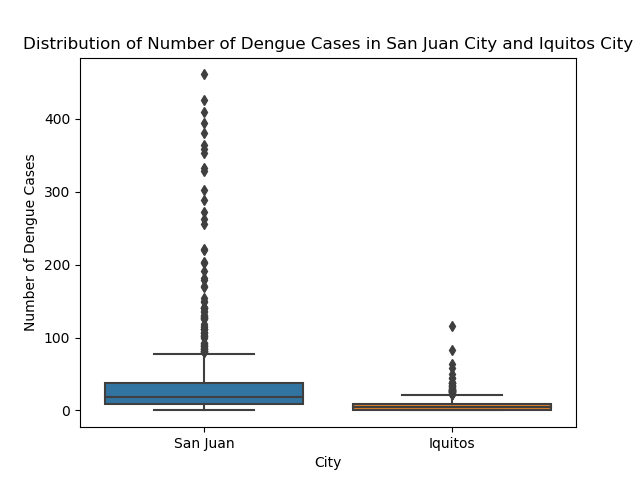

Text(0.5,1,'Distribution of Number of Dengue Cases in San Juan City and Iquitos City')

In [8]:
%matplotlib notebook
sns.boxplot(x='city', y='total_cases', data=dengue)
plt.xlabel('City')
plt.ylabel('Number of Dengue Cases')
plt.title('Distribution of Number of Dengue Cases in San Juan City and Iquitos City')

# Histogram 

<IPython.core.display.Javascript object>


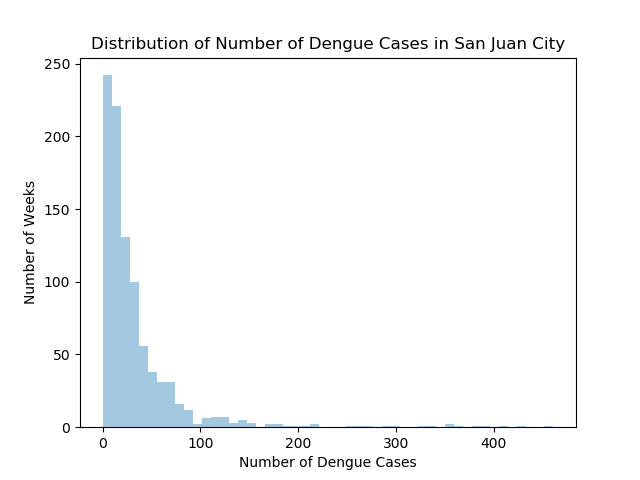

Text(0.5,1,'Distribution of Number of Dengue Cases in San Juan City')

In [9]:
%matplotlib notebook

#Univariate histogram for quantitative variable:
sns.distplot(sub2["total_cases"].dropna(), kde=False);
plt.xlabel('Number of Dengue Cases')
plt.ylabel('Number of Weeks')
plt.title('Distribution of Number of Dengue Cases in San Juan City')

# Line chart 

<IPython.core.display.Javascript object>


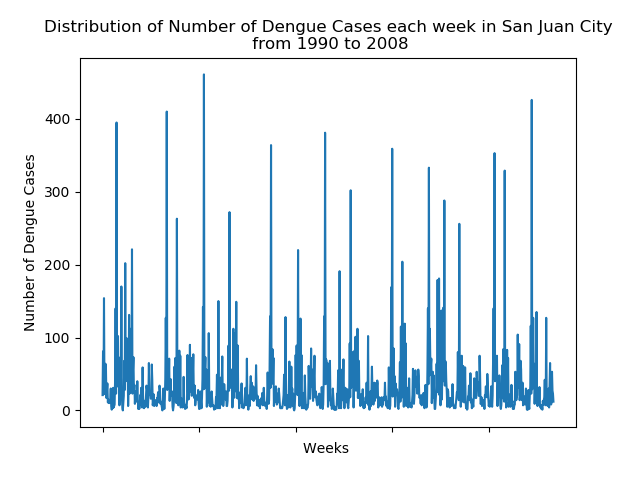

Text(0.5,1,'Distribution of Number of Dengue Cases each week in San Juan City\n from 1990 to 2008')

In [10]:
%matplotlib notebook

# Grouping values within individual variables
var = sub2.groupby(['week_start_date']).total_cases.sum()

fig = plt.figure()
var.plot(kind='line')
plt.xlabel('Weeks ')
plt.ylabel('Number of Dengue Cases')
plt.title('Distribution of Number of Dengue Cases each week in San Juan City'+ '\n' + ' from 1990 to 2008')

# Bubble chart 

In [11]:
#convert variable to numeric
sub2['station_avg_temp_c'] = pd.to_numeric(sub2['station_avg_temp_c'],errors='coerce')
sub2['station_precip_mm'] = pd.to_numeric(sub2['station_precip_mm'],errors='coerce')

#clean sub2 by drop na value in blank data
sub2_clean=sub2.dropna()

<IPython.core.display.Javascript object>


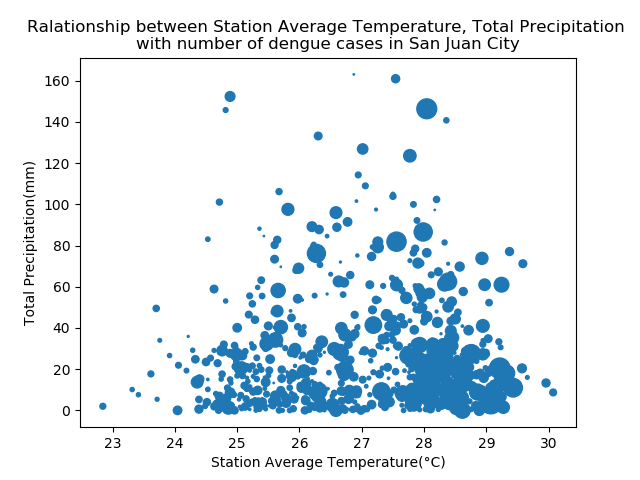

Text(0.5,1,'Ralationship between Station Average Temperature, Total Precipitation \nwith number of dengue cases in San Juan City')

In [12]:
# x = station average temperature
# y = total precipitation
# Added third variable total cases as size of the bubble
%matplotlib notebook
fig = plt.figure()
plt.scatter(sub2_clean['station_avg_temp_c'],sub2_clean['station_precip_mm'], s=sub2_clean['total_cases']) 
plt.xlabel('Station Average Temperature(°C)')
plt.ylabel('Total Precipitation(mm)')
plt.title('Ralationship between Station Average Temperature, Total Precipitation '+ '\n' + 'with number of dengue cases in San Juan City')